# Titanic Survival Classification


The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

Do a complete analysis on what sorts of people were likely to survive. 

In [1]:
import warnings
warnings.filterwarnings("ignore")

Importing the CSV file 

In [2]:
import pandas as pd 
tit_df= pd.read_csv ('titanic_train.csv')

Using Pandas Profiling,exporting the summary report in html file

In [3]:
import pandas_profiling as pf
pfr = pf.ProfileReport(tit_df)
pfr.to_file('tit-pfr.html')

In [4]:
tit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
 tit_df.shape

(891, 12)

Dropping the unique feature columns

In [6]:
df= tit_df.drop(['PassengerId','Ticket','Fare','Embarked','Name','Cabin'],axis='columns')
df.shape

(891, 6)

***'PassengerId','Ticket','Fare','Name','Cabin'*** -- are dropped because they unique feature columns

**'Embarked'**-- is dropped because Embarked is port of embarkation 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 41.8+ KB


Checking for unique varibale in each columns

In [8]:
def df_unique(X):
    for i in X.columns:
        print('Column : ',i,'\n',X[i].unique(), '\n Total unique values is: ', X[i].nunique())
        print('----------------------------------------------------------------------')
df_unique(df)

Column :  Survived 
 [0 1] 
 Total unique values is:  2
----------------------------------------------------------------------
Column :  Pclass 
 [3 1 2] 
 Total unique values is:  3
----------------------------------------------------------------------
Column :  Sex 
 ['male' 'female'] 
 Total unique values is:  2
----------------------------------------------------------------------
Column :  Age 
 [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ] 
 Total unique values is:  88
-------------------------------------

Checking number of unique varibles in each colums

In [9]:
def unique_counts(Y):
    for i in Y.columns:
        print(Y[i].value_counts())
        print('----------------------------------------------------------------------')
unique_counts(df)

0    549
1    342
Name: Survived, dtype: int64
----------------------------------------------------------------------
3    491
1    216
2    184
Name: Pclass, dtype: int64
----------------------------------------------------------------------
male      577
female    314
Name: Sex, dtype: int64
----------------------------------------------------------------------
24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
28.00    25
21.00    24
25.00    23
36.00    22
29.00    20
32.00    18
27.00    18
35.00    18
26.00    18
16.00    17
31.00    17
20.00    15
33.00    15
23.00    15
34.00    15
39.00    14
17.00    13
42.00    13
40.00    13
45.00    12
38.00    11
50.00    10
2.00     10
4.00     10
47.00     9
         ..
71.00     2
59.00     2
63.00     2
0.83      2
30.50     2
70.00     2
57.00     2
0.75      2
13.00     2
10.00     2
64.00     2
40.50     2
32.50     2
45.50     2
20.50     1
24.50     1
0.67      1
14.50     1
0.92      1
74.00     1
34.50     1
80.00     

Checking for number of na values in each columns 

In [10]:
print('Number of NA values in each columns:--\n')
def is_na(Z):
    for i in Z.columns:
        print(i,'column',' :',Z[i].isna().sum(),'\n')
is_na(df)

Number of NA values in each columns:--

Survived column  : 0 

Pclass column  : 0 

Sex column  : 0 

Age column  : 177 

SibSp column  : 0 

Parch column  : 0 



Assigning the features for X and Y

In [11]:
x = tit_df.drop(['PassengerId','Ticket','Fare','Embarked','Cabin','Survived'],axis='columns')
print('Shape of x:',x.shape)
print()
y = tit_df.Survived
print('Shape of y:',y.shape)

Shape of x: (891, 6)

Shape of y: (891,)


Filling the NA values in Age column

(891,)


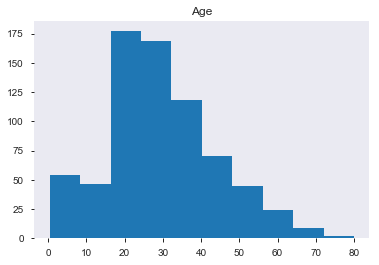

In [12]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
df.hist('Age',grid=False)
print(df.Age.shape)

Null values in Age is :  0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D3E1FBBA90>]],
      dtype=object)

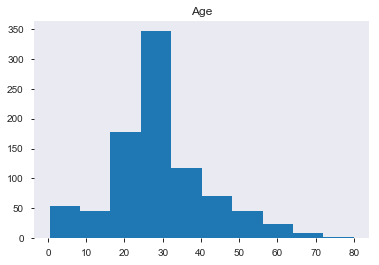

In [13]:
mean_value = x['Age'].mean()
x['Age']=x['Age'].fillna(mean_value)
print ('Null values in Age is : ',x['Age'].isna().sum())
x.hist('Age',grid=False)

Standardizing the Age column 

In [14]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x.Age=sc.fit_transform(x[['Age']])
display (x[:5])

,Pclass,Name,Sex,Age,SibSp,Parch
0,3,"Braund, Mr. Owen Harris",male,-0.592481,1,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.638789,1,0
2,3,"Heikkinen, Miss. Laina",female,-0.284663,0,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.407926,1,0
4,3,"Allen, Mr. William Henry",male,0.407926,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D3E1F656A0>]],
      dtype=object)

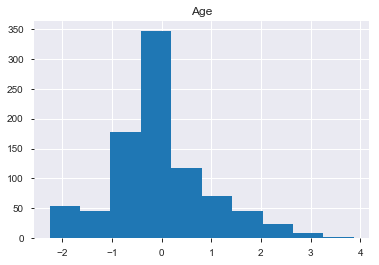

In [15]:
x.hist('Age',grid=True)

Extracting the title from the Name column 

In [16]:
x['Title']=x.Name.str.split().str[1].str.split('.').str[0]
x.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Title
0,3,"Braund, Mr. Owen Harris",male,-0.592481,1,0,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.638789,1,0,Mrs
2,3,"Heikkinen, Miss. Laina",female,-0.284663,0,0,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.407926,1,0,Mrs
4,3,"Allen, Mr. William Henry",male,0.407926,0,0,Mr


In [17]:
x.Title.value_counts()

Mr              502
Miss            179
Mrs             121
Master           40
Dr                7
Rev               6
y                 4
Planke,           3
Impe,             3
Col               2
Major             2
Mlle              2
Gordon,           2
Messemaeker,      1
Steen,            1
Billiard,         1
Don               1
Ms                1
Walle,            1
Mulder,           1
der               1
Shawah,           1
Cruyssen,         1
Mme               1
Jonkheer          1
Velde,            1
Carlo,            1
Melkebeke,        1
the               1
Pelsmaeker,       1
Capt              1
Name: Title, dtype: int64

In [18]:
x=x.drop('Name',axis=1)
x.head(3)

,Pclass,Sex,Age,SibSp,Parch,Title
0,3,male,-0.592481,1,0,Mr
1,1,female,0.638789,1,0,Mrs
2,3,female,-0.284663,0,0,Miss


Encoding the title column

In [19]:
x=x.replace(to_replace =['Master','Dr','Capt','Major','Col'],value ="officers") 

In [20]:
x=x.replace(to_replace=['Carlo,','Melkebeke,','Billiard,','Jonkheer','the','der','Ms','Cruyssen,','Mme','Steen,','Shawah,','Velde,','Walle,','Don','Pelsmaeker,','Messemaeker,','Mulder,','Gordon,','Mlle','Planke,','Impe,','y','Rev'],value='others')
x.Title.value_counts()

Mr          502
Miss        179
Mrs         121
officers     52
others       37
Name: Title, dtype: int64

In [21]:
x = x.join(pd.get_dummies(x.Title, prefix ='Title'))

In [22]:
x=x.drop(['Title','Title_others'],axis=1)
x.head(3)

,Pclass,Sex,Age,SibSp,Parch,Title_Miss,Title_Mr,Title_Mrs,Title_officers
0,3,male,-0.592481,1,0,0,1,0,0
1,1,female,0.638789,1,0,0,0,1,0
2,3,female,-0.284663,0,0,1,0,0,0


Creating dummies to Parch column

In [23]:
x = x.join(pd.get_dummies(x.Parch, prefix ='Parch'))
x=x.drop(['Parch','Parch_0'],axis=1)
x.head(3)

,Pclass,Sex,Age,SibSp,Title_Miss,Title_Mr,Title_Mrs,Title_officers,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,3,male,-0.592481,1,0,1,0,0,0,0,0,0,0,0
1,1,female,0.638789,1,0,0,1,0,0,0,0,0,0,0
2,3,female,-0.284663,0,1,0,0,0,0,0,0,0,0,0


Creating dummies to SibSp column

In [24]:
x = x.join(pd.get_dummies(x.SibSp, prefix ='SibSp'))
x=x.drop(['SibSp','SibSp_0'],axis=1)
x.head(3)

,Pclass,Sex,Age,Title_Miss,Title_Mr,Title_Mrs,Title_officers,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8
0,3,male,-0.592481,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,female,0.638789,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,3,female,-0.284663,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Encoding and Creating dummies to sex column

In [25]:
x = x.join(pd.get_dummies(x.Sex, prefix ='sex'))
x=x.drop(['Sex','sex_female'],axis=1)
x.head(3)

,Pclass,Age,Title_Miss,Title_Mr,Title_Mrs,Title_officers,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,sex_male
0,3,-0.592481,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,1,0.638789,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,3,-0.284663,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
x = x.join(pd.get_dummies(x.Pclass, prefix ='pclass'))
x=x.drop(['Pclass','pclass_3'],axis=1)
x.head(3)

,Age,Title_Miss,Title_Mr,Title_Mrs,Title_officers,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,sex_male,pclass_1,pclass_2
0,-0.592481,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,0.638789,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,-0.284663,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
print('Shape of X is: ',x.shape)

Shape of X is:  (891, 20)


In [28]:
import seaborn as sns

In [29]:
x_corr=x.corr()

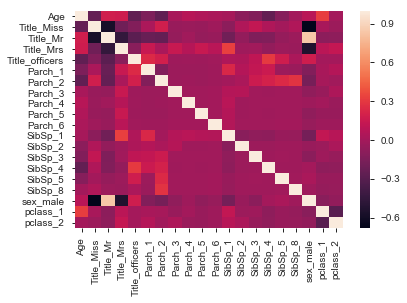

In [30]:
sns.heatmap(x_corr)

In [31]:
import statsmodels.api as sm

In [32]:
import statsmodels.formula.api as smf

In [33]:
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     80.37
Date:                Sun, 22 Dec 2019   Prob (F-statistic):          5.77e-182
Time:                        16:02:40   Log-Likelihood:                -371.81
No. Observations:                 891   AIC:                             783.6
Df Residuals:                     871   BIC:                             879.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Age               -0.0630      0.015     -4.

Training the dataset

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)
print('Shape of x  train: ',x_train.shape)
print('Shape of x  test: ',x_test.shape)
print('Shape of y  train: ',y_train.shape)
print('Shape of y  test: ',y_test.shape)

Shape of x  train:  (712, 20)
Shape of x  test:  (179, 20)
Shape of y  train:  (712,)
Shape of y  test:  (179,)


In [35]:
from sklearn.metrics import accuracy_score , classification_report

Light Gradient Boosting Algorithm

In [36]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(boosting_type='dart',n_jobs=-1,objective='binary')

In [37]:
lgbm.fit(x_train,y_train)
pred_lgbm = lgbm.predict(x_test)

In [38]:
pred_lgbm = lgbm.predict(x_test)

In [39]:
print('LGBM training accuracy score is : ', accuracy_score(y_train,lgbm.predict(x_train)))
print()
print('LGBM predicted accuracy score is : ', accuracy_score(y_test,pred_lgbm ))

LGBM training accuracy score is :  0.8525280898876404

LGBM predicted accuracy score is :  0.8547486033519553


In [40]:
cr_lgbm = classification_report(y_test,pred_lgbm)
print ('Classification report for LGBM is :\n ',cr_lgbm)

Classification report for LGBM is :
                precision    recall  f1-score   support

           0       0.87      0.91      0.89       117
           1       0.82      0.74      0.78        62

   micro avg       0.85      0.85      0.85       179
   macro avg       0.85      0.83      0.84       179
weighted avg       0.85      0.85      0.85       179



Support Vector Classfier and Grid search CV

In [41]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import numpy as np
C=np.logspace(-2,2,5)
gamma=np.logspace(-5,5,5)
kernel=['linear', 'rbf', 'sigmoid']
param_grid = dict(C=C,gamma=gamma,kernel=kernel)

In [42]:
grid = GridSearchCV(SVC(),param_grid=param_grid,n_jobs=-1)

In [43]:
grid.fit(x_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'gamma': array([1.00000e-05, 3.16228e-03, 1.00000e+00, 3.16228e+02, 1.00000e+05]), 'kernel': ['linear', 'rbf', 'sigmoid']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [44]:
pred_svc=grid.predict(x_test)

In [45]:
print('Grid Search best parameter for SVC are : ',grid.best_params_)

Grid Search best parameter for SVC are :  {'C': 10.0, 'gamma': 1e-05, 'kernel': 'linear'}


In [46]:
print('SVC training accuracy score is : ' , accuracy_score(y_train,grid.predict(x_train)))
print()
print('SVC predicted accuracy score is : ', accuracy_score (y_test,pred_svc))

SVC training accuracy score is :  0.8202247191011236

SVC predicted accuracy score is :  0.8379888268156425


In [47]:
cr_svc = classification_report(y_test,pred_svc)
print ('Classification report for SVC is :\n ',cr_svc)

Classification report for SVC is :
                precision    recall  f1-score   support

           0       0.88      0.87      0.88       117
           1       0.76      0.77      0.77        62

   micro avg       0.84      0.84      0.84       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.84      0.84      0.84       179



XG Boost

In [48]:
import xgboost

In [49]:
xgb = xgboost.XGBClassifier(n_jobs=-1)

In [50]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=-1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [51]:
pred_xgb = xgb.predict(x_test)

In [52]:
print('XGB training accuracy score is : ',accuracy_score(y_train,xgb.predict(x_train)))
print()
print('XGB predicted accuracy score is : ', accuracy_score(y_test,pred_xgb ))

XGB training accuracy score is :  0.8525280898876404

XGB predicted accuracy score is :  0.8603351955307262


In [53]:
from sklearn.metrics import roc_auc_score 
xg_roc = roc_auc_score (y_test,pred_xgb)
xg_roc

0.8438792390405294

In [54]:
xg_proba = xgb.predict_proba(x_test)
xg_proba[:5,:]

array([[0.8815533 , 0.11844671],
       [0.8804829 , 0.11951712],
       [0.80224526, 0.19775477],
       [0.03861105, 0.96138895],
       [0.01715356, 0.98284644]], dtype=float32)

In [55]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, xgb.predict_proba(x_test)[:,1])
print('fpr :')
print(fpr[:5])
print('tpr :')
print(tpr[:5])
print('thresholds :')
print(thresholds[:5])

fpr :
[0.         0.         0.         0.00854701 0.00854701]
tpr :
[0.         0.01612903 0.08064516 0.08064516 0.14516129]
thresholds :
[1.985767   0.985767   0.9688741  0.9684965  0.96138895]


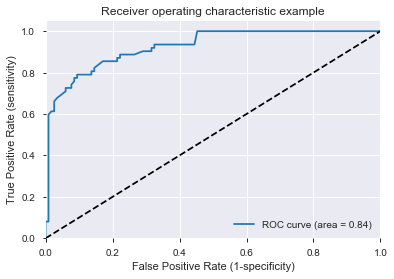

In [56]:
plt.figure()
plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)'%xg_roc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1-specificity)')
plt.ylabel('True Positive Rate (sensitivity)')
plt.title('Receiver operating characteristic example')
plt.legend(loc ="lower right")
plt.show()

In [57]:
cr_xgb= classification_report(y_test,pred_xgb)
print ('Classification report for XGB is :\n ',cr_xgb)

Classification report for XGB is :
                precision    recall  f1-score   support

           0       0.89      0.90      0.89       117
           1       0.80      0.79      0.80        62

   micro avg       0.86      0.86      0.86       179
   macro avg       0.85      0.84      0.85       179
weighted avg       0.86      0.86      0.86       179



Accuracy score of LGBM vs SVC vs XGBoost

In [58]:
print('LGBM predicted accuracy score is : ', accuracy_score(y_test,pred_lgbm ))
print()
print('SVC predicted accuracy score is : ', accuracy_score (y_test,pred_svc))
print()
print('XGB predicted accuracy score is : ', accuracy_score(y_test,pred_xgb ))

LGBM predicted accuracy score is :  0.8547486033519553

SVC predicted accuracy score is :  0.8379888268156425

XGB predicted accuracy score is :  0.8603351955307262
